<a href="https://colab.research.google.com/github/Riddars/Hakaton_04.09.23/blob/main/Hakaton_04_09(Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit
!pip install pycaret
!pip install lazypredict
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
import networkx as nx


import lazypredict
from lazypredict.Supervised import LazyRegressor #Regression

import pickle

import tensorflow as tf

In [2]:
# Загрузка данных из CSV файлов
data_df = pd.read_csv('https://raw.githubusercontent.com/Riddars/Hakaton_04.09.23/main/DF.csv', index_col=0)

(2881, 16)


<Axes: >

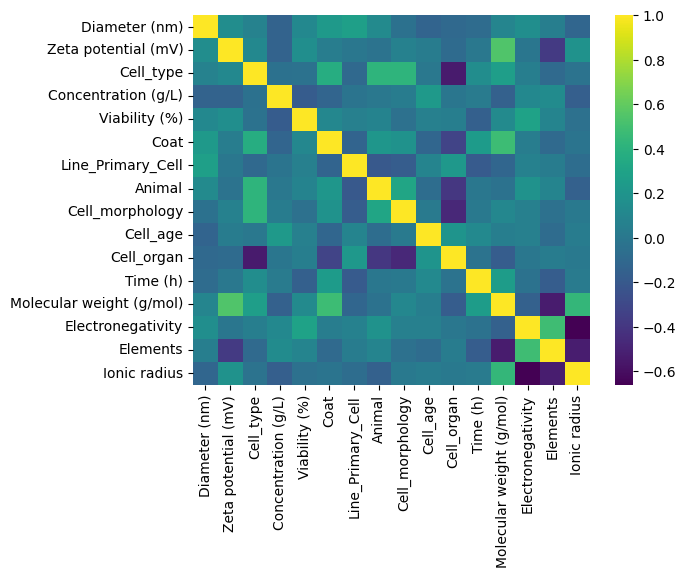

In [21]:
# посмотрим корреляцию столбцов с числовыми значениями
print(data_df.shape)
sns.heatmap(data_df.corr(), cmap='viridis', yticklabels=True)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2881 entries, 0 to 17
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Diameter (nm)             2881 non-null   float64
 1   Zeta potential (mV)       2881 non-null   float64
 2   Cell_type                 2881 non-null   int64  
 3   Concentration (g/L)       2881 non-null   float64
 4   Viability (%)             2881 non-null   float64
 5   Coat                      2881 non-null   int64  
 6   Line_Primary_Cell         2881 non-null   int64  
 7   Animal                    2881 non-null   int64  
 8   Cell_morphology           2881 non-null   int64  
 9   Cell_age                  2881 non-null   int64  
 10  Cell_organ                2881 non-null   int64  
 11  Time (h)                  2881 non-null   float64
 12  Molecular weight (g/mol)  2881 non-null   float64
 13  Electronegativity         2881 non-null   float64
 14  Elements  

In [ ]:
# data = data_df
# # Подготовка данных
# X = data.drop(['Viability (%)'], axis=1).values
# y = data['Viability (%)'].values

# X_scaled = X

# # Разделение данных на обучающий, валидационный и тестовый наборы
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Определите функцию, которая создает вашу модель
# def create_model(optimizer='adam', activation='relu', neurons=32):
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)),
#         tf.keras.layers.Dense(neurons, activation=activation),
#         tf.keras.layers.Dense(1)
#     ])
#     model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
#     return model

# # Создайте обертку для модели, чтобы она могла быть использована с GridSearchCV
# model = KerasRegressor(build_fn=create_model, epochs=600, batch_size=32, verbose=0)

# # Задайте сетку параметров для Grid Search
# param_grid = {
#     'optimizer': ['adam', 'sgd'],  # Список оптимизаторов для перебора
#     'activation': ['relu', 'tanh'],  # Список функций активации для перебора
#     'neurons': [16, 32, 64]  # Список количества нейронов для перебора
# }

# # Создайте объект GridSearchCV и выполните поиск
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
# grid_result = grid.fit(X_train, y_train)

# # Выведите лучшие параметры и оценку модели
# print("Лучшие параметры: ", grid_result.best_params_)
# print("Лучшая оценка (MSE): ", grid_result.best_score_)

# # Теперь можно использовать оптимальные параметры для оценки модели на тестовых данных
# best_params = grid_result.best_params_
# best_model = create_model(optimizer=best_params['optimizer'], activation=best_params['activation'], neurons=best_params['neurons'])

# # Оцените модель с оптимальными параметрами на тестовых данных
# test_loss, test_mae = best_model.evaluate(X_test, y_test)
# print(f"Среднеквадратичная ошибка на тестовом наборе: {test_loss}")
# print(f"Средняя абсолютная ошибка на тестовом наборе: {test_mae}")

# # Используйте модель для предсказания значений
# predictions = best_model.predict(X_test)

# # Выведите предсказанные значения и соответствующие истинные значения
# for i in range(len(predictions)):
#     print(f'Predicted: {predictions[i]}, True: {y_test[i]}')

# # Вычислите R2-score
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test, predictions)
# print(f'R2-score: {r2}')

# # Вычислите RMSE
# from sklearn.metrics import mean_squared_error
# import numpy as np
# rmse = np.sqrt(mean_squared_error(y_test, predictions))
# print(f'RMSE: {rmse}')

# # Отобразите график потерь
# import matplotlib.pyplot as plt
# # plt.plot(best_model.history.history['loss'])
# # plt.plot(best_model.history.history['val_loss'])
# # plt.title('Model Loss')
# # plt.ylabel('Loss')
# # plt.xlabel('Epoch')
# # plt.legend(['Train', 'Validation'], loc='upper right')
# # plt.show()

Epoch 1/200
72/72 [==============================] - 1s 5ms/step - loss: 3445.6611 - mean_absolute_error: 49.7635 - val_loss: 1381.0122 - val_mean_absolute_error: 31.3633
Epoch 2/200
72/72 [==============================] - 0s 2ms/step - loss: 1437.9830 - mean_absolute_error: 30.4152 - val_loss: 1115.6743 - val_mean_absolute_error: 28.2189
Epoch 3/200
72/72 [==============================] - 0s 5ms/step - loss: 1277.3979 - mean_absolute_error: 28.2954 - val_loss: 1064.1030 - val_mean_absolute_error: 27.4005
Epoch 4/200
72/72 [==============================] - 0s 2ms/step - loss: 1235.0444 - mean_absolute_error: 27.5361 - val_loss: 1039.7159 - val_mean_absolute_error: 27.0094
Epoch 5/200
72/72 [==============================] - 0s 2ms/step - loss: 1208.5002 - mean_absolute_error: 27.1652 - val_loss: 1022.9602 - val_mean_absolute_error: 26.7241
Epoch 6/200
72/72 [==============================] - 0s 2ms/step - loss: 1176.9492 - mean_absolute_error: 26.6963 - val_loss: 1009.2111 - val_mea

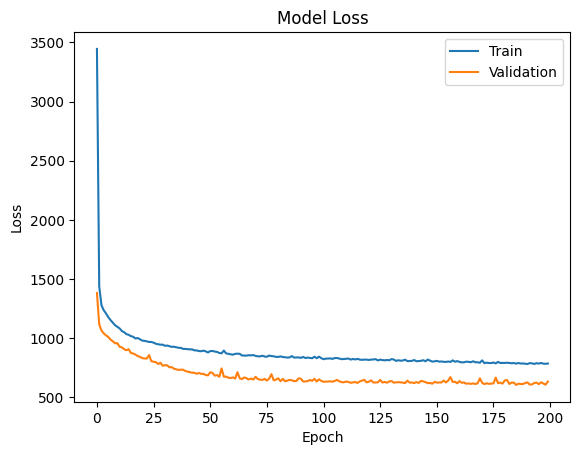

In [4]:
# Загрузка данных
data = data_df

# Подготовка данных
X = data.drop(['Viability (%)'], axis=1).values
y = data['Viability (%)'].values

X_scaled = X

# Разделение данных на обучающий, валидационный и тестовый наборы
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Создание модели нейронной сети
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Компиляция модели с функцией потерь и оптимизатором
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))

# Оценка модели на тестовом наборе данных
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Среднеквадратичная ошибка на тестовом наборе: {test_loss}")
print(f"Средняя абсолютная ошибка на тестовом наборе: {test_mae}")
# Оценка точности модели на тестовой выборке
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')

# Использование модели для предсказания значений
predictions = model.predict(X_test)

# Вывод предсказанных значений и соответствующих истинных значений
for i in range(len(predictions)):
    print(f'Predicted: {predictions[i]}, True: {y_test[i]}')

# Вычисление R2-score
r2 = r2_score(y_test, predictions)
print(f'R2-score: {r2}')

# Вычисление RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**СЛУЧАЙНЫЙ ЛЕС**

In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Разделение данных на признаки (X) и целевую переменную (y)
X = data_df.drop('Viability (%)', axis=1)
y = data_df['Viability (%)']

# Создание модели случайного леса с настраиваемыми параметрами
model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    bootstrap=True,
    oob_score=False,
    criterion='squared_error'
)

# Обучение модели случайного леса на всем наборе данных
model.fit(X, y)

# Предсказание на всем наборе данных
y_pred = model.predict(X)

# Оценка производительности модели на всем наборе данных
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")



Root Mean Squared Error (RMSE): 19.285576460243167
R-squared: 0.6789788699534999


In [4]:
import joblib

# Сохранение модели в файл "model.pkl"
joblib.dump(model, "model.pkl")

['model.pkl']

In [23]:
import sys
print("Версия Python:", sys.version)

Версия Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


[0]	validation_0-rmse:71.98738
[1]	validation_0-rmse:65.70970
[2]	validation_0-rmse:60.05578
[3]	validation_0-rmse:55.03948
[4]	validation_0-rmse:50.56530
[5]	validation_0-rmse:46.59739
[6]	validation_0-rmse:43.19868
[7]	validation_0-rmse:40.17410
[8]	validation_0-rmse:37.40877
[9]	validation_0-rmse:35.09278
[10]	validation_0-rmse:33.09541
[11]	validation_0-rmse:31.33406
[12]	validation_0-rmse:29.84604
[13]	validation_0-rmse:28.51514
[14]	validation_0-rmse:27.35872
[15]	validation_0-rmse:26.42420
[16]	validation_0-rmse:25.62832
[17]	validation_0-rmse:25.07580
[18]	validation_0-rmse:24.44389
[19]	validation_0-rmse:23.94064
[20]	validation_0-rmse:23.79235
[21]	validation_0-rmse:23.56526
[22]	validation_0-rmse:23.20937
[23]	validation_0-rmse:22.97514
[24]	validation_0-rmse:22.91993
[25]	validation_0-rmse:22.87115
[26]	validation_0-rmse:22.76798
[27]	validation_0-rmse:22.91681
[28]	validation_0-rmse:22.82908
[29]	validation_0-rmse:22.65636
[30]	validation_0-rmse:22.70091
[31]	validation_0-

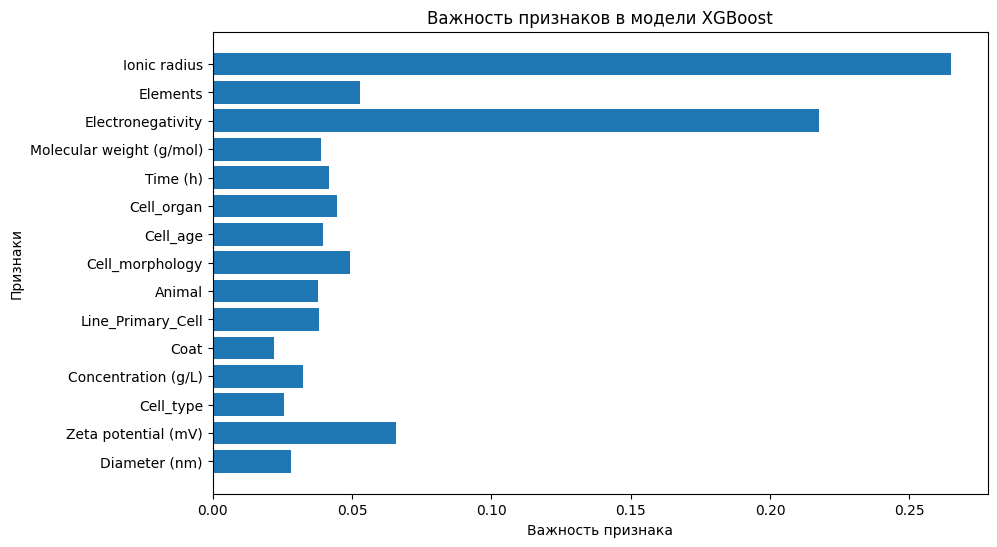

In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np  # Добавляем импорт numpy

# Разделение данных на признаки (X) и целевую переменную (y)
X = data_df.drop('Viability (%)', axis=1)
y = data_df['Viability (%)']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и настройка модели градиентного бустинга (XGBoost)
model = xgb.XGBRegressor(
    n_estimators=100,  # Количество деревьев
    learning_rate=0.1,  # Скорость обучения
    max_depth=10,  # Максимальная глубина деревьев
    min_child_weight=1,  # Минимальный вес в узле
    subsample=0.8,  # Доля обучающих данных для каждого дерева
    colsample_bytree=0.8,  # Доля признаков для каждого дерева
    gamma=0,  # Минимальное уменьшение функции потерь
    reg_alpha=0,  # L1 регуляризация
    reg_lambda=1,  # L2 регуляризация
    objective='reg:squarederror',  # Задача оптимизации для регрессии
)

# Обучение модели
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=1)

# Предсказание на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Вычисляем RMSE

print(f"Root Mean Squared Error (RMSE): {rmse}")  # Выводим RMSE вместо MSE
print(f"R-squared: {r2_score(y_test, y_pred)}")  # Оставляем R-squared как есть
# важность признаков
feature_importance = model.feature_importances_

# график важности признаков
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), X_train.columns)
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков в модели XGBoost')
plt.show()

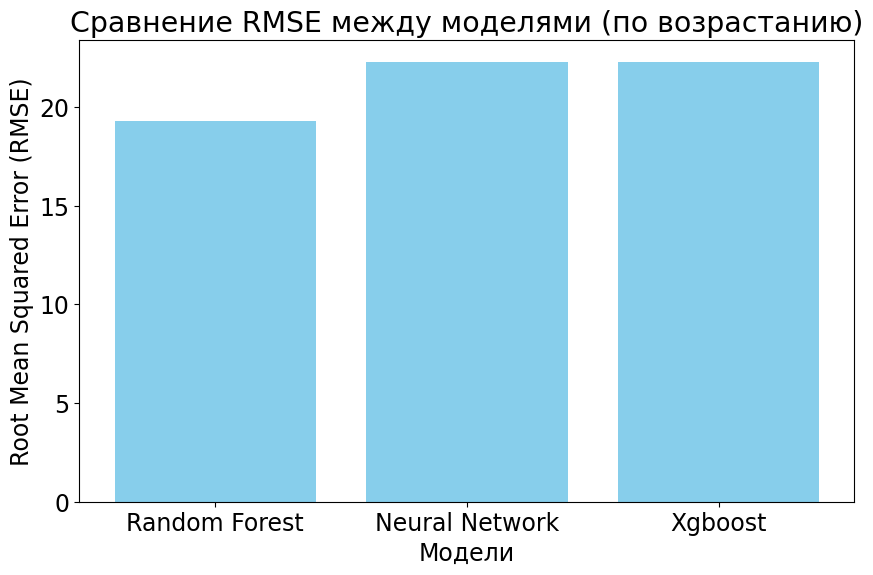

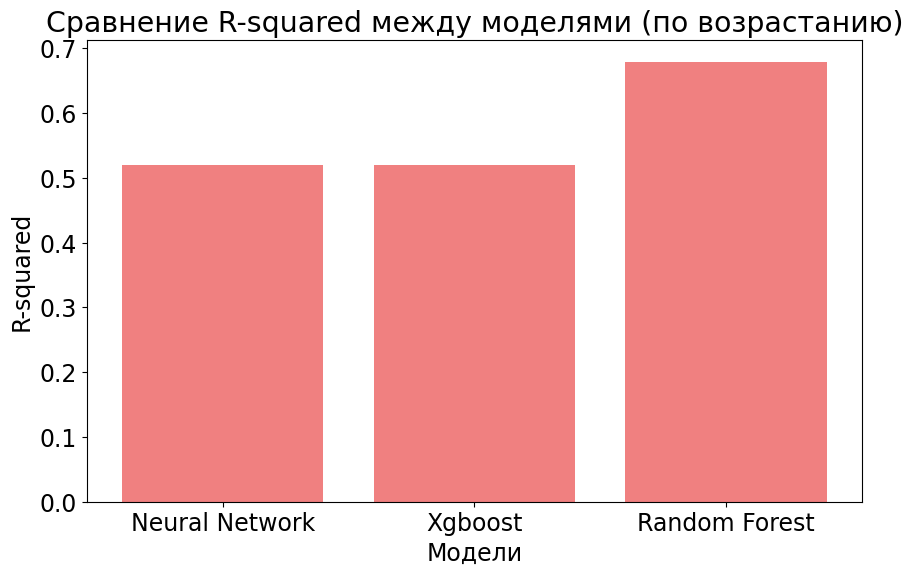

In [40]:
import matplotlib.pyplot as plt

# Устанавливаем размер шрифта
plt.rcParams.update({'font.size': 17})

# Задаем названия моделей и соответствующие метрики RMSE
model_names = ['Neural Network', 'Random Forest', 'Xgboost']
rmse_scores = [22.29010874028978, 19.285576460243167, 22.29010874028978]

# Сортируем модели и RMSE по RMSE в порядке возрастания
sorted_data = sorted(zip(model_names, rmse_scores), key=lambda x: x[1])
sorted_models, sorted_rmse_scores = zip(*sorted_data)

# Создаем график сравнения метрик RMSE
plt.figure(figsize=(10, 6))
plt.bar(sorted_models, sorted_rmse_scores, color='skyblue')
plt.xlabel('Модели')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Сравнение RMSE между моделями (по возрастанию)')
plt.show()

# Задаем соответствующие метрики R-squared
r2_scores = [0.5194315522149129, 0.6789788699534999, 0.5194315522149129]

# Сортируем модели и RMSE по RMSE в порядке возрастания
sorted_data_r2 = sorted(zip(model_names, r2_scores), key=lambda x: x[1])
sorted_models_r2, sorted_r2_scores = zip(*sorted_data_r2)

# Создаем график сравнения метрик R-squared
plt.figure(figsize=(10, 6))
plt.bar(sorted_models_r2, sorted_r2_scores, color='lightcoral')
plt.xlabel('Модели')
plt.ylabel('R-squared')
plt.title('Сравнение R-squared между моделями (по возрастанию)')
plt.show()